# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tasya Salsabila
- **Email:** salsabilailhamtasya@gmail.com
- **ID Dicoding:** tsyaslsbl

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata jumlah penyewaan sepeda setiap harinya pada jam sibuk (peak hours)
- Bagaimana kondisi cuaca mempengaruhi permintaan sepeda pada hari kerja maupun weekend

## Import Semua Packages/Library yang Digunakan

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [52]:
day_data = pd.read_csv("day.csv")
hour_data = pd.read_csv("hour.csv")

In [53]:
# Membaca data day 10 teratas
day_data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [54]:
# Membaca data hour 10 teratas
hour_data.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


**Insight:**
- Data yang ada selama 2 tahun (2011, 2012)
- Kategori season (1: musim semi, 2:musim panas, 3:musim gugur, 4:musim dingin)
- instant merupakan indeks unik

### Assessing Data

In [55]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Perbedaan jumlah data, data untuk day lebih sedikit dibandingkan dengan data yang hour
- Kedua dataset tidak memiliki data yang kosong (Terlihat pada kolom ketiga yaitu non-null)
- Ada 1 perbedaan pada kedua dataset, yaitu pada dataset hour ada penambahan kolom **hr** yang tidak ada pada dataset day

### Karena berdasarkan step sebelumnya, kita bisa melihat kalau dataset tidak memiliki nilai kosong, maka dibawah saya mengecek apakah ada nilai data yang double (duplikat)

In [56]:
# Mengecek duplikat untuk dataset hour
hour_data.duplicated().sum()

0

In [57]:
# Mengecek duplikat untuk dataset day
day_data.duplicated().sum()

0

### Cleaning Data

In [58]:
# Mengubah tipe data "dteday" menjadi datetime
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
day_data['dteday'] = pd.to_datetime(day_data['dteday'])

In [59]:
day_data.info()
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Proses pengubahan tipe data untuk "dteday" dilakukan agar memudahkan proses analisis. Karena tentunya, waktu memiliki format yang tipe data objek tidak bisa membaca
- Dapat dilihat, setelah dilakukan proses konversi, tipe data untuk kolom "dteday" berubah dari object menjadi datetime64

## Exploratory Data Analysis (EDA)

### Explore ...

In [60]:
# Menggabungkan 2 dataset agar memudahkan proses selanjutnya
data_gabungan = pd.merge(hour_data, day_data, on="dteday", suffixes=("_hour", "_day"))
data_gabungan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

In [61]:
# Code dibawah untuk mendownload dataset gabungan (hour dan day)
# agar memudahkan pembuatan di streamlit
data_gabungan.to_csv("data_gabungan.csv", index=False)

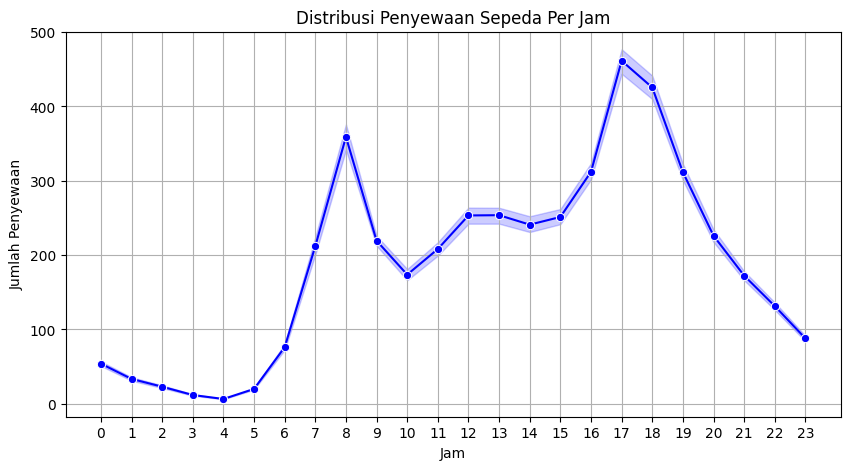

In [62]:
# Proses ini menggunakan EDA Univariate, untuk membantu menjawab analisis
# pertanyaan bisnis nomor 1
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt_hour', data=data_gabungan, marker='o', color='b')
plt.title('Distribusi Penyewaan Sepeda Per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

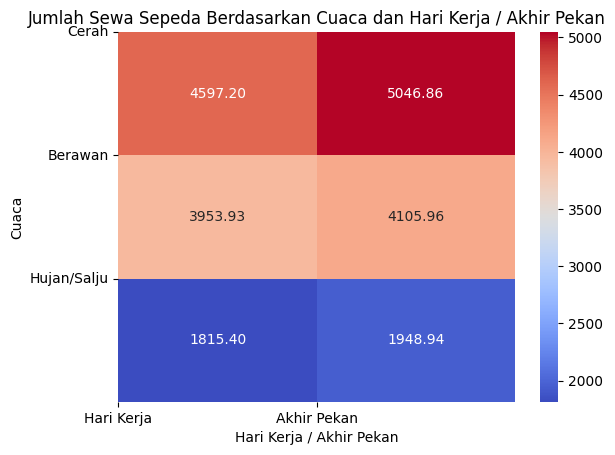

In [64]:
# Heatmap antara hari kerja vs akhir pekan dengan cuaca dan jumlah sewa sepeda
pivot = data_gabungan.pivot_table(values='cnt_day', index='weathersit_day', columns='workingday_day', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Jumlah Sewa Sepeda Berdasarkan Cuaca dan Hari Kerja / Akhir Pekan')
plt.xlabel('Hari Kerja / Akhir Pekan')
plt.ylabel('Cuaca')
plt.yticks(ticks=[0,1,2], labels=['Cerah', 'Berawan', 'Hujan/Salju'])
plt.yticks(rotation=0)
plt.xticks(ticks=[0, 1], labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()


**Insight:**
- Explore EDA Univariate dilakukan untuk menjawab pertanyaan nomor 1. Alasannya karena pertanyaan nomor 1 saya ingin mengetahui rata-rata penyewaan harian pada jam sibuk (peak hours). Maka, menggunakan EDA Univariate sangat cocok, karena tidak memerlukan variabel lain.
- Dengan menggunakan EDA Univariate juga kita bisa melihat pola peak hours dengan mudah.
- Explore EDA Multivariate dilakukan untuk menjawab pertanyaan nomor 2. Alasannya, karena pertanyaan nomor 2 saya ingin mengetahui apakah ada pengaruh cuaca terhadap jumlah penyewaan sepeda.
- EDA Univariate saya rasa tidak cocok untuk membantu eksplorasi pertanyaan kedua saya, karena adanya faktor X (dalam kasus ini cuaca) yang perlu diperhatikan hubungannya dengan jumlah penyewaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [65]:
# Identifikasi jam sibuk terlebih dahulu
# Berdasarkan Explore diatas, kita mengambil TOP 3 peak hours
peak_hours = data_gabungan.groupby('hr')['cnt_hour'].mean().sort_values(ascending=False).head(3).index
peak_hours

Index([17, 18, 8], dtype='int64', name='hr')

In [66]:
# Menghitung rata-rata penyewaan harian pada jam sibuk
peak_hour_rentals = data_gabungan[data_gabungan['hr'].isin(peak_hours)].groupby('weekday_day')['cnt_hour'].mean()
peak_hour_rentals

,cnt_hour
weekday_day,
0,225.085714
1,465.310897
2,511.464516
3,498.514469
4,506.061093
5,458.560897
6,246.834395


In [67]:
# Agar kelihatan rapi, maka saya mau membulatkan hasil rata-rata penyewaan diatas
peak_hour_rentals = peak_hour_rentals.round()
peak_hour_rentals

,cnt_hour
weekday_day,
0,225.0
1,465.0
2,511.0
3,499.0
4,506.0
5,459.0
6,247.0


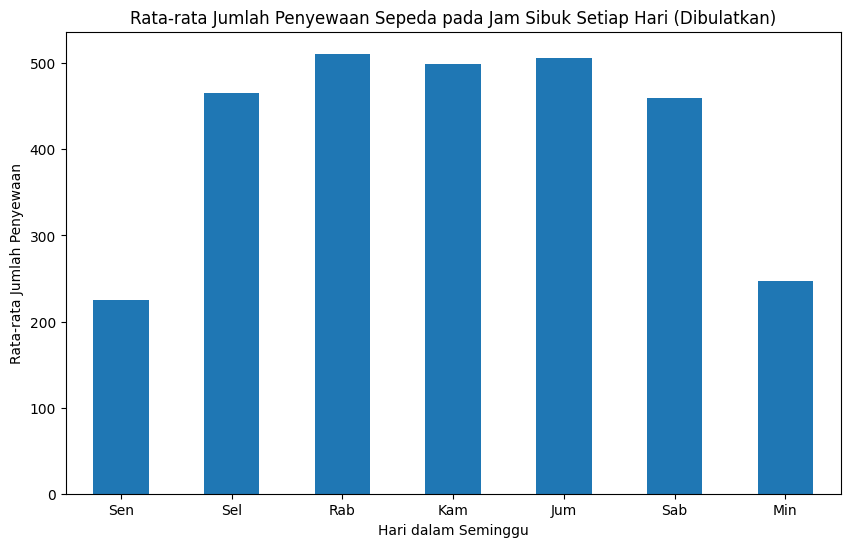

In [68]:
# Visualisasi
plt.figure(figsize=(10, 6))
peak_hour_rentals.plot(kind='bar')
plt.title("Rata-rata Jumlah Penyewaan Sepeda pada Jam Sibuk Setiap Hari (Dibulatkan)")
plt.xlabel("Hari dalam Seminggu")
plt.ylabel("Rata-rata Jumlah Penyewaan")
#Diberikan xticks atau label untuk range 0-6 sebelumnya, sehingga memudahkan
# orang-orang untuk melihat hasilnya
plt.xticks(ticks=range(7), labels=['Sen', 'Sel', 'Rab', 'Kam', 'Jum', 'Sab', 'Min'])
plt.xticks(rotation=0)
plt.show()

### Pertanyaan 2:

In [69]:
# Mengelompokkan data untuk hari kerja dan cuaca
kerja_cuaca_data = data_gabungan.groupby(['workingday_day','weathersit_day'])['cnt_hour'].mean().unstack()

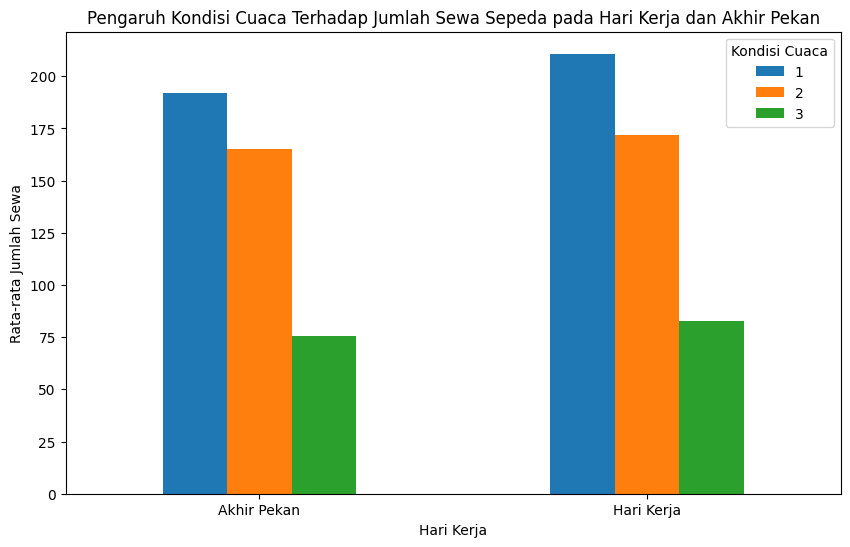

In [70]:
kerja_cuaca_data.plot(kind='bar', figsize=(10, 6))
plt.title('Pengaruh Kondisi Cuaca Terhadap Jumlah Sewa Sepeda pada Hari Kerja dan Akhir Pekan')
plt.xlabel('Hari Kerja')
plt.ylabel('Rata-rata Jumlah Sewa')
plt.xticks(rotation=0)
plt.xticks(ticks=range(2), labels=['Akhir Pekan','Hari Kerja'])
plt.legend(title='Kondisi Cuaca')
plt.show()

**Insight:**
####PERTANYAAN 1
- Hari ke-0 dan ke-6 meruapakan rata-rata penyewaan sepeda terenda, karena kedua hari ini merupakan akhir pekan, yang dimana orang-orang tidak bekerja maupun bersekolah hingga penyewaan sepeda sangat rendah.
- Hari tertinggi penyewaan sepeda adalah hari ke-2 dan ke-3 (Selasa dan Rabu).
- Meskipun, di hari kerja terdapat perbedaan yang signifikan antara hari ke-1 dan ke-2. Perbedaan ini bisa jadi karena adanya faktor-faktor yang belum dianalisis, seperti faktor cuaca pada hari itu yang membuat penyewaan sepeda turun.


#### PERTANYAAN 2
- weathersit :
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Pada hari kerja, cuaca yang cerah memengaruhi penyewaan sepeda. Begitu juga pada weekend, apabila cuaca cerah maka penyewaan sepeda juga cukup tinggi.
-

## Analisis Lanjutan (Opsional)

## Conclusion

- Pada jam sibuk (peak hours), yang biasanya mengacu pada jam-jam tertentu seperti pagi hari (misalnya antara jam 7 hingga 9 pagi) dan sore hari (misalnya antara jam 4 hingga 6 sore), ditemukan bahwa rata-rata jumlah penyewaan sepeda cenderung lebih tinggi. Pada kasus ini, ditemukan bahwa pada jam 8 pagi, 5 sore dan 6 sore merupakan jam yang memiliki jumlah penyewaan sepeda tertinggi.
- Jam masuk kerja dan pulang kerja, di mana orang cenderung menggunakan sepeda untuk berangkat atau pulang dari kantor.
- Baik di hari kerja, maupun weekend apabila cuaca cerah, penyewaan sepeda juga pasti akan meningkat. Sedangkan, apabila cuaca buruk dalam hal ini kategori nomor 3 maka penyewaan sepeda juga turun drastis. Ini membuktikan bahwa cuaca merupakan salah satu faktor penting dalam penyewaan sepeda
- Secara umum, cuaca cerah memberikan dampak positif yang lebih besar terhadap hari kerja, sementara pada akhir pekan, faktor lain selain cuaca (misalnya, liburan atau kegiatan sosial) lebih berperan dalam mempengaruhi permintaan sepeda.